# A Python Tour of Data Science

[Michaël Defferrard](http://deff.ch), *PhD student*, [EPFL](http://epfl.ch) [LTS2](http://lts2.epfl.ch)

This short primer is an introduction to the scientific [Python](https://www.python.org) stack for [Data Science](https://en.wikipedia.org/wiki/Data_science). It is designed as a tour around the major Python packages used for the main computational tasks encountered in [the sexiest job of the 21st century](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century). At the end of this tour, you'll have a broad overview of the available libraries as well as why and how they are used for each task. This notebook aims at answering the following question: **which tool should I use for which task**. Before starting, two remarks:
1. There exists better / faster ways to accomplish the presented computations. The goal is to present the packages and get a sense of which problems they solve.
1. It is not meant to teach you (scientific) Python. I however tried to include the main constructions and idioms of the language and packages. A good ressource to learn scientific Python is a [set of lectures](https://github.com/jrjohansson/scientific-python-lectures) from J.R. Janson.

<img src= "https://upload.wikimedia.org/wikipedia/commons/b/ba/Data_visualization_process_v1.png" style="margin: 0px 0px 5px 20px; width: 600px; float: right;">

This notebook will walk you through a typical Data Science **process**:
1. **Data acquisition**
    1. Importation
    1. Cleaning
    1. Exploration
1. **Data exploitation**
    1. Pre-processing
    1. (Feature extraction)
    1. Modeling
    1. (Algorithm design)
    1. Evaluation

Our **motivating example**: predict whether a credit card client will default.
* It is a binary classification task: client will default or not ($y=1$ if yes; $y=0$ if no).
* We have data for 30'000 real clients from Taiwan.
* There is 23 numerical & categorical explanatory variables:
    1. $x_1$: amount of the given credit.
    2. $x_2$: gender (1 = male; 2 = female).
    3. $x_3$: education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
    4. $x_4$: marital status (1 = married; 2 = single; 3 = others).
    5. $x_5$: age (year).
    6. $x_6$ to $x_{11}$: history of past payment (monthly from September to April, 2005) (-1 = pay duly; 1 = payment delay for one month; ...; 9 = payment delay for nine months and above).
    7. $x_{12}$ to $x_{17}$: amount of bill statement (monthly from September to April, 2005).
    8. $x_{18}$ to $x_{23}$: amount of previous payment (monthly from September to April, 2005).
* The data comes from the [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).

During this tour, we'll need the packages shown below, which are best installed from [PyPI](https://pypi.python.org) in a [virtual environment](https://docs.python.org/3/library/venv.html):
```
$ pyvenv /path/to/new/virtual/env
$ . /path/to/new/virtual/env/bin/activate
$ pip install -r requirements.txt
$ jupyter-notebook
```

In [1]:
%%script sh
cat requirements.txt

numpy
scipy
matplotlib
scikit-learn

pandas
xlrd
xlwt
tables
sqlalchemy

statsmodels
sympy
autograd
bokeh
numba
Cython

keras
#theano
#tensorflow

jupyter
ipython


The statements starting with `%` or `%%` are [built-in magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html), i.e. commands interpreted by the IPython kernel. E.g. `%%script sh` tells IPython to run the cell with `sh` (like the `#!` line at the beginning of script).

In [2]:
# While packages are usually imported at the top, they can
# be imported wherever you prefer, in whatever scope.
import numpy as np

## 0 Python

Before taking our tour, let's briefly talk about Python.
First thing first, the general characteristics of the language:
* **General purpose**: not built for a particular usage, it works as well for scientific computing as for web and application development. It features high-level data structures and supports multiple paradigms: procedural, object-oriented and functional.
* **Elegant syntax**: easy-to-read and intuitive code, easy-to-learn minimalistic syntax, quick to write (low boilerplate / verbosity), maintainability scales well with size of projects.
* **Expressive language**: fewer lines of code, fewer bugs, easier to maintain.

Technical details:
* **Dynamically typed**: no need to define the type of variables, function arguments or return types. Everything is an object and can be modified at runtime.
* **Automatic memory management** (garbage collector): no need to explicitly allocate and deallocate memory for variables and data arrays. No memory leak bugs.
* **Interpreted** (JIT is coming): No need to compile the code. The Python interpreter reads and executes the python code directly. It also means that a single Python source runs anywhere a runtime is available, like on Windows, Mac, Linux and in the Cloud.

From those characteristics emerge the following advantages:
* The main advantage is ease of programming, minimizing the time required to develop, debug and maintain the code.
* The well designed language encourages many good programming practices:
    * Modular and object-oriented programming, good system for packaging and re-use of code. This often results in more transparent, maintainable and bug-free code.
    * Documentation tightly integrated with the code.
* A large community geared toward open-source, an extensive standard library and a large collection of add-on packages and development tools.

And the following disadvantages:
* There is two versions of Python in general use: 2 and 3. While Python 3 is around since 2008, there are still libraries which only support Python 2. While you should generally go for Python 3, a specific library or legacy code can hold you on Python 2.
* Due to its interpreted and dynamic nature, the execution of Python code can be slow compared to compiled statically typed programming languages, such as C and Fortran. That is however almost solved, see the available solutions at the end of this notebook.
* There is no compiler to catch your errors. Solutions include unit / integration tests or the use of a [linter](https://en.wikipedia.org/wiki/Lint_%28software%29) such as [pyflakes](https://pypi.python.org/pypi/pyflakes), [Pylint](https://www.pylint.org) or [PyChecker](http://pychecker.sourceforge.net). [Flake8](https://pypi.python.org/pypi/flake8) combines static analysis with style checking.

### 0.1 Why Python for Data Science

Let's state [why is Python a language of choice for Data Scientists](https://www.quora.com/Why-is-Python-a-language-of-choice-for-data-scientists). Viable alternatives include [matlab](http://ch.mathworks.com/products/matlab), [R](https://www.r-project.org) and [Julia](http://julialang.org), and, for more statistical jobs, the SAS and SPSS statistical packages. The strenghs of Python are:
* Minimal development time.
    * Rapid prototyping for data exploration.
    * Same language and framework for R&D and production.
* A strong position in scientific computing.
    * Large community of users, easy to find help and documentation.
    * Extensive ecosystem of open-source scientific libraries and environments.
* Easy integration.
    * Many libraries to access data from files, databases or web scraping.
    * Many wrappers to legacy code, e.g. C, Fortran or Matlab.
* Available and suitable for High Performance Computing (HPC)
    * Close integration with time-tested and highly optimized libraries for fast numerical mathematics like BLAS, LAPACK, ATLAS, OpenBLAS, ARPACK, MKL, etc.
    * JIT and AOT compilers.
    * Good support for parallel processing with processes and threads, interprocess communication (MPI) and GPU computing (OpenCL and CUDA).

### 0.2 Why Jupyter 

[Jupyter](http://jupyter.org) notebook is an HTML-based notebook which allows you to create and share documents that contain live code, equations, visualizations and explanatory text. It allows a clean presentation of computational results as HTML or PDF reports and is well suited for interactive tasks surch as data cleaning, transformation and exploration, numerical simulation, statistical modeling, machine learning and more. It runs everywhere (Window, Mac, Linux, Cloud) and supports multiple languages through various kernels, e.g. [Python](https://ipython.org), [R](https://irkernel.github.io), [Julia](https://github.com/JuliaLang/IJulia.jl), [Matlab](https://github.com/Calysto/matlab_kernel).

While Jupyter is itself becoming an Integreted Development Environment (IDE), alternative scientific IDEs include [Spyder](https://pythonhosted.org/spyder) and [Rodeo](http://rodeo.yhat.com). Non-scientific IDEs include [IDLE](https://docs.python.org/3/library/idle.html) and [PyCharm](https://www.jetbrains.com/pycharm). Vim and Emacs lovers (or more recently Atom and Sublime Text) will find full support of Python in their editor of choice. An interactive prompt, useful for experimentations or as a calculator, is offered by Python itself or by [IPython](https://ipython.org), the Jupyter kernel for Python.

## 1 Data Importation

* The world is messy, we got data in CSV, [JSON](http://www.json.org), Excel, [HDF5](https://www.hdfgroup.org/HDF5) files and an SQL database.
* Could also have been matlab, HTML, XML files or from the web via scraping and APIs (e.g. [Twitter Firhose](https://dev.twitter.com/streaming/firehose)) or noSQL data stores, etc.

In [3]:
# Download the data.
import utils
utils.get_data('data/')

In [4]:
!ls data

bills.hdf5  demographics.csv  payments.sqlite
delays.xls  original.xls      target.json


### 1.1 Importing from an SQL Database

[SQLAlchemy](http://www.sqlalchemy.org/) to the rescue.
* Abstraction between DBAPIs.
    * Supported databases: SQLite, Postgresql, MySQL, Oracle, MS-SQL, Firebird, Sybase and others.
* [SQL Expression Language](http://docs.sqlalchemy.org/en/rel_1_0/core/tutorial.html).
* [Object Relational Mapper (ORM)](http://docs.sqlalchemy.org/en/rel_1_0/orm/tutorial.html).

In [5]:
import sqlalchemy
engine = sqlalchemy.create_engine('sqlite:///data/payments.sqlite', echo=False)

# Infer from existing DB.
metadata = sqlalchemy.MetaData()
metadata.reflect(engine)

# An SQL SELECT statement.
table = metadata.tables.get('payments')
op = sqlalchemy.sql.select([table])
engine.echo = True
result = engine.execute(op)
engine.echo = False

2016-09-16 17:29:36,249 INFO sqlalchemy.engine.base.Engine SELECT payments."ID", payments."PAY1", payments."PAY2", payments."PAY3", payments."PAY4", payments."PAY5", payments."PAY6" 
FROM payments
2016-09-16 17:29:36,250 INFO sqlalchemy.engine.base.Engine ()


In [6]:
# Show some lines, i.e. clients.
for row in result.fetchmany(size=10):
    print('ID: {:2d}, payments: {}'.format(row[0], row[1:]))
result.close()

ID:  1, payments: (0, 689, 0, 0, 0, 0)
ID:  2, payments: (0, 1000, 1000, 1000, 0, 2000)
ID:  3, payments: (1518, 1500, 1000, 1000, 1000, 5000)
ID:  4, payments: (2000, 2019, 1200, 1100, 1069, 1000)
ID:  5, payments: (2000, 36681, 10000, 9000, 689, 679)
ID:  6, payments: (2500, 1815, 657, 1000, 1000, 800)
ID:  7, payments: (55000, 40000, 38000, 20239, 13750, 13770)
ID:  8, payments: (380, 601, 0, 581, 1687, 1542)
ID:  9, payments: (3329, 0, 432, 1000, 1000, 1000)
ID: 10, payments: (0, 0, 0, 13007, 1122, 0)


In [7]:
# Execute some raw SQL.
paid = 1000
op = sqlalchemy.sql.text('SELECT payments."ID", payments."PAY6" FROM payments WHERE payments."PAY6" = {}'.format(paid))
result = engine.execute(op).fetchall()
print('{} clients paid {} in April 2005'.format(len(result), paid))

1299 clients paid 1000 in April 2005


### 1.2 Merging data Sources

Put some [pandas](http://pandas.pydata.org/) in our Python !
* Import / export data from / to various sources.
* Data frames manipulations: slicing, dicing, grouping.
* And many more !

In [8]:
def get_data(directory):
    demographics = pd.read_csv(directory + 'demographics.csv', index_col=0)
    delays = pd.read_excel(directory + 'delays.xls', index_col=0)
    bills = pd.read_hdf(directory + 'bills.hdf5', 'bills')
    payments = pd.read_sql('payments', engine, index_col='ID')
    target = pd.read_json(directory + 'target.json')
    return pd.concat([demographics, delays, bills, payments, target], axis=1)

import pandas as pd
data = get_data('data/')
attributes = data.columns.tolist()

# Tansform from numerical to categorical variable.
data['SEX'] = data['SEX'].astype('category')
data['SEX'].cat.categories = ['MALE', 'FEMALE']
data['MARRIAGE'] = data['MARRIAGE'].astype('category')
data['MARRIAGE'].cat.categories = ['UNK', 'MARRIED', 'SINGLE', 'OTHERS']
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['EDUCATION'].cat.categories = ['UNK', 'GRAD SCHOOL', 'UNIVERSITY', 'HIGH SCHOOL', 'OTHERS', 'UNK1', 'UNK2']

### 1.3 Looking at the Data

In [9]:
data.loc[:6, ['LIMIT', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'DEFAULT']]

,LIMIT,SEX,EDUCATION,MARRIAGE,AGE,DEFAULT
ID,,,,,,
1,20000,FEMALE,UNIVERSITY,MARRIED,24,1
2,120000,FEMALE,UNIVERSITY,SINGLE,26,1
3,90000,FEMALE,UNIVERSITY,SINGLE,34,0
4,50000,FEMALE,UNIVERSITY,MARRIED,37,0
5,50000,MALE,UNIVERSITY,MARRIED,57,0
6,50000,MALE,GRAD SCHOOL,SINGLE,37,0


In [10]:
data.iloc[:5, 4:10]

,AGE,DELAY1,DELAY2,DELAY3,DELAY4,DELAY5
ID,,,,,,
1,24,2,2,-1,-1,-2
2,26,-1,2,0,0,0
3,34,0,0,0,0,0
4,37,0,0,0,0,0
5,57,-1,0,-1,0,0


In [11]:
data.iloc[:5, 11:23]

,BILL1,BILL2,BILL3,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6
ID,,,,,,,,,,,,
1,3913,3102,689,0,0,0,0,689,0,0,0,0
2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


Export as an [HTML table](./subset.html) for manual inspection.

In [12]:
data[:1000].to_html('subset.html')

## 2 Data Cleaning

While cleaning data is the [most time-consuming, least enjoyable Data Science task](http://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says), it should be perfomed nonetheless. Problems come in two flavours:

1. Missing data, i.e. unknown values.
1. Errors in data, i.e. wrong values.

The actions to be taken in each case is highly **data and problem specific**.

Example: marital status
1. According to dataset description, it should either be 1 (married), 2 (single) or 3 (others).
1. But we find some 0 (previously transformed to `UNK`).
1. Let's *assume* that 0 represents errors when collecting the data and that we should remove those clients.

In [13]:
print(data['MARRIAGE'].value_counts())
data = data[data['MARRIAGE'] != 'UNK']
data['MARRIAGE'] = data['MARRIAGE'].cat.remove_unused_categories()
print('\nWe are left with {} clients\n'.format(data.shape))
print(data['MARRIAGE'].unique())

SINGLE     15964
MARRIED    13659
OTHERS       323
UNK           54
Name: MARRIAGE, dtype: int64

We are left with (29946, 24) clients

[MARRIED, SINGLE, OTHERS]
Categories (3, object): [MARRIED, SINGLE, OTHERS]


Example: education
1. It should either be 1 (graduate school), 2 (university), 3 (high school) or 4 (others).
1. But we find some 0, 5 and 6 (previously transformed to `UNK`, `UNK1` and `UNK2`).
1. Let's *assume* these values are dubious, but do not invalidate the data and keep them as they may have some predictive power.

In [14]:
print(data['EDUCATION'].value_counts())
data.loc[data['EDUCATION']=='UNK1', 'EDUCATION'] = 'UNK'
data.loc[data['EDUCATION']=='UNK2', 'EDUCATION'] = 'UNK'
data['EDUCATION'] = data['EDUCATION'].cat.remove_unused_categories()
print(data['EDUCATION'].value_counts())

UNIVERSITY     14024
GRAD SCHOOL    10581
HIGH SCHOOL     4873
UNK1             280
OTHERS           123
UNK2              51
UNK               14
Name: EDUCATION, dtype: int64
UNIVERSITY     14024
GRAD SCHOOL    10581
HIGH SCHOOL     4873
UNK              345
OTHERS           123
Name: EDUCATION, dtype: int64


## 3 Data Exploration

* Get descriptive statistics.
* Plot informative figures.
* Verify some intuitive correlations.

Let's get first some descriptive statistics of our numerical variables.

In [15]:
attributes_numerical = ['LIMIT', 'AGE']
attributes_numerical.extend(attributes[11:23])
data.loc[:, attributes_numerical].describe().astype(np.int)

,LIMIT,AGE,BILL1,BILL2,BILL3,BILL4,BILL5,BILL6,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6
count,29946,29946,29946,29946,29946,29946,29946,29946,29946,29946,29946,29946,29946,29946
mean,167546,35,51278,49224,47063,43306,40352,38911,5659,5926,5227,4829,4804,5220
std,129807,9,73682,71219,69393,64374,60836,59592,16552,23060,17618,15677,15290,17791
min,10000,21,-165580,-69777,-157264,-170000,-81334,-339603,0,0,0,0,0,0
25%,50000,28,3570,2988,2684,2335,1770,1261,1000,836,390,298,255,122
50%,140000,34,22400,21221,20108,19066,18121,17098,2100,2010,1800,1500,1500,1500
75%,240000,41,67263,64108,60240,54601,50244,49248,5007,5000,4511,4015,4040,4000
max,1000000,79,964511,983931,1664089,891586,927171,961664,873552,1684259,896040,621000,426529,528666


Let's plot an histogram of the ages, so that we get a better impression of who our clients are. That may even be an end goal, e.g. if your marketing team asks which customer groups to target.

Then a boxplot of the bills, which may serve as a verification of the quality of the acquired data.

In [16]:
data.loc[:, 'AGE'].plot.hist(bins=20, figsize=(15,5))
ax = data.iloc[:, 11:17].plot.box(logy=True, figsize=(15,5))

Simple **question**: which proportion of our clients default ?

In [17]:
percentage = data['DEFAULT'].value_counts()[1] / data.shape[0] * 100
print('Percentage of defaults: {:.2f}%'.format(percentage))

Percentage of defaults: 22.14%


Another **question**: who's more susceptible to default, males or females ?

In [18]:
observed = pd.crosstab(data['SEX'], data['DEFAULT'], margins=True)
observed

DEFAULT,0,1,All
SEX,,,
MALE,9003,2871,11874
FEMALE,14312,3760,18072
All,23315,6631,29946


Seems like females are better risk. Let's verify with a Chi-Squared test of independance, using [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html).

In [19]:
import scipy.stats as stats
_, p, _, expected = stats.chi2_contingency(observed.iloc[:2,:2])
print('p-value = {:.2e}'.format(p))
print('expected values:\n{}'.format(expected))

p-value = 6.75e-12
expected values:
[[  9244.71749148   2629.28250852]
 [ 14070.28250852   4001.71749148]]


**Intuition**: people who pay late present a higher risk of defaulting. Let's verify !
Verifying some intuitions will also help you to identify mistakes. E.g. it would be suspicious if that intuition is not verified in the data: did we select the right column, or did we miss-compute a result ?

In [20]:
group = data.groupby('DELAY1').mean()
corr = data['DEFAULT'].corr(data['DELAY1'], method='pearson')
group['DEFAULT'].plot(grid=True, title='Pearson correlation: {:.4f}'.format(corr), figsize=(15,5));

## 4 Interactive Visualization

[Bokeh](http://bokeh.pydata.org) is a Python interactive visualization library that targets modern web browsers for presentation, in the style of [D3.js](https://d3js.org). Alternatively, [matplotlib.widgets](http://matplotlib.org/api/widgets_api.html) could be used. Those interactive visualizations are very helpful to explore the data at hand in the quest of anomalies or patterns. Try with the plots below !

In [21]:
from bokeh.plotting import output_notebook, figure, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource

output_notebook()

x, y1, y2 = 'LIMIT', 'PAY1', 'PAY2'
n = 1000  # Less intensive for the browser.

options = dict(
    tools='pan,box_zoom,wheel_zoom,box_select,lasso_select,crosshair,reset,save',
    x_axis_type='log', y_axis_type='log',
)
plot1 = figure(
    x_range=[1e4,1e6],
    x_axis_label=x, y_axis_label=y1,
    **options
)
plot2 = figure(
    x_range=plot1.x_range, y_range=plot1.y_range,
    x_axis_label=x, y_axis_label=y2,
    **options
)

html_color = lambda r,g,b: '#{:02x}{:02x}{:02x}'.format(r,g,b)
colors = [html_color(150,0,0) if default == 1 else html_color(0,150,0) for default in data['DEFAULT'][:n]]
# The above line is a list comprehension.

radii = data['AGE'][:n] / 5

# To link brushing (where a selection on one plot causes a selection to update on other plots).
source = ColumnDataSource(data=dict(x=data[x][:n], y1=data[y1][:n], y2=data[y2][:n]))

plot1.scatter('x', 'y1', source=source, size=radii, color=colors, alpha=0.6)
plot2.scatter('x', 'y2', source=source, size=radii, color=colors, alpha=0.6)

plot = gridplot([[plot1, plot2]], toolbar_location='right', plot_width=400, plot_height=400, title='adsf')

show(plot)

Loading BokehJS ...

## 5 Pre-Processing

Back to [NumPy](http://www.numpy.org/), the fundamental package for scientific computing with Python. It provides multi-dimensional arrays, data types and linear algebra routines. Note that [scikit-learn](http://scikit-learn.org) provides many helpers for those tasks.

Pre-processing usually consists of:
1. Data types transformation. The data has not necessarilly the format the chosen learning algorithm expects.
1. Data normalization. Some algorithms expect data to be centered and scaled. Some will train faster.
1. Data randomization. If the samples are presented in sequence, it'll train faster if they are not correlated.
1. Train / test splitting. You may have to be careful here, e.g. not including future events in the training set.

In [22]:
# Back to numeric values.
# Note: in a serious project, these should be treated as categories.
data['SEX'].cat.categories = [-1, 1]
data['SEX'] = data['SEX'].astype(np.int)
data['MARRIAGE'].cat.categories = [-1, 1, 0]
data['MARRIAGE'] = data['MARRIAGE'].astype(np.int)
data['EDUCATION'].cat.categories = [-2, 2, 1, 0, -1]
data['EDUCATION'] = data['EDUCATION'].astype(np.int)

data['DEFAULT'] = data['DEFAULT'] * 2 - 1  # [0,1] --> [-1,1]

In [23]:
# Observations and targets.
X = data.values[:,:23]
y = data.values[:,23]
n, d = X.shape
print('The data is a {} with {} samples of dimensionality {}.'.format(type(X), n, d))

The data is a <class 'numpy.ndarray'> with 29946 samples of dimensionality 23.


In [24]:
# Center and scale.
# Note: on a serious project, should be done after train / test split.
X = X.astype(np.float)
X -= X.mean(axis=0)
X /= X.std(axis=0)

In [25]:
# Training and testing sets.
test_size = 10000
print('Split: {} testing and {} training samples'.format(test_size, y.size - test_size))
perm = np.random.permutation(y.size)
X_test  = X[perm[:test_size]]
X_train = X[perm[test_size:]]
y_test  = y[perm[:test_size]]
y_train = y[perm[test_size:]]

Split: 10000 testing and 19946 training samples


## 6 A first Predictive Model

The ingredients of a Machine Learning (ML) model are:
1. A predictive function, e.g. the linear transformation $f(x) = x^Tw + b$.
1. An error function, e.g. the least squares $E = \sum_{i=1}^n \left( f(x_i) - y_i \right)^2 = \| f(X) - y \|_2^2$.
1. An optional regularization, e.g. the Thikonov regularization $R = \|w\|_2^2$.
1. Which makes up the loss / objective function $L = E + \alpha R$.

Our model has a sole hyper-parameter, $\alpha \geq 0$, which controls the shrinkage.

A Machine Learning (ML) problem can often be cast as a (convex or smooth) optimization problem which objective is to find the parameters (here $w$ and $b$) who minimize the loss, e.g.
$$\hat{w}, \hat{b} = \operatorname*{arg min}_{w,b} L = \operatorname*{arg min}_{w,b} \| Xw + b - y \|_2^2 + \alpha \|w\|_2^2.$$

If the problem is convex and smooth, one can compute the gradients
$$\frac{\partial L}{\partial{w}} = 2 X^T (Xw+b-y) + 2\alpha w,$$
$$\frac{\partial L}{\partial{b}} = 2 \sum_{i=1}^n (x_i^Tw+b-y_i) = 2 \sum_{i=1}^n (x_i^Tw-y_i) + 2n \cdot b,$$

which can be used in a [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) scheme or to form closed-form solutions:
$$\frac{\partial L}{\partial{w}} = 0 \ \rightarrow \ 2 X^T X\hat{w} + 2\alpha \hat{w} = 2 X^T y - 2 X^T b \ \rightarrow \ \hat{w} = (X^T X + \alpha I)^{-1} X^T (y-b),$$
$$\frac{\partial L}{\partial{b}} = 0 \ \rightarrow \ 2n\hat{b} = 2\sum_{i=1}^n (y_i) - \underbrace{2\sum_{i=1}^n (x_i^Tw)}_{=0 \text{ if centered}} \ \rightarrow \ \hat{b} = \frac1n I^T y = \operatorname{mean}(y).$$

What if the resulting problem is non-smooth ? See the [PyUNLocBoX](http://pyunlocbox.readthedocs.io), a convex optimization toolbox which implements [proximal splitting methods](https://en.wikipedia.org/wiki/Proximal_gradient_method).

### 6.1 Take a *symbolic* Derivative

Let's verify our manually derived gradients ! [SymPy](http://www.sympy.org/) is our computer algebra system (CAS) (like [Mathematica](https://www.wolfram.com/mathematica), [Maple](https://www.maplesoft.com/products/Maple)) of choice.

In [26]:
import sympy as sp
sp.init_printing()

X, y, w, b, a = sp.symbols('x y w b a')
L = (X*w + b - y)**2 + a*w**2

dLdw = sp.diff(L, w)
dLdb = sp.diff(L, b)

from IPython.display import display
display(L)
display(dLdw)
display(dLdb)

### 6.2 Build the Classifier

Relying on the derived equations, we can implement our model relying only on the [NumPy](http://www.numpy.org/) linear algebra capabilities (really wrappers to [BLAS](http://www.netlib.org/blas) / [LAPACK](http://www.netlib.org/lapack) implementations such as [ATLAS](http://math-atlas.sourceforge.net), [OpenBLAS](http://www.openblas.net) or [MKL](https://software.intel.com/intel-mkl)).

A ML model is best represented as a class, with hyper-parameters and parameters stored as attributes, and is composed of two essential methods:
1. `y_pred = model.predict(X_test)`: return the predictions $y$ given the features $X$.
1. `model.fit(X_train, y_train)`: learn the model parameters such as to predict $y$ given $X$.

In [27]:
class RidgeRegression(object):
    """Our ML model."""
    
    def __init__(self, alpha=0):
        "The class' constructor. Initialize the hyper-parameters."
        self.a = alpha
    
    def predict(self, X):
        """Return the predicted class given the features."""
        return np.sign(X.dot(self.w) + self.b)
    
    def fit(self, X, y):
        """Learn the model's parameters given the training data, the closed-form way."""
        n, d = X.shape
        self.b = np.mean(y)
        Ainv = np.linalg.inv(X.T.dot(X) + self.a * np.identity(d))
        self.w = Ainv.dot(X.T).dot(y - self.b)

    def loss(self, X, y, w=None, b=None):
        """Return the current loss.
        This method is not strictly necessary, but it provides
        information on the convergence of the learning process."""
        w = self.w if w is None else w  # The ternary conditional operator
        b = self.b if b is None else b  # makes those tests concise.
        import autograd.numpy as np  # See below for autograd.
        return np.linalg.norm(np.dot(X, w) + b - y)**2 + self.a * np.linalg.norm(w, 2)**2

Now that our model can learn its parameters and predict targets, it's time to evaluate it. Our metric for binary classification is the accuracy, which gives the percentage of correcly classified test samples. Depending on the application, the time spent for inference or training might also be important.

In [28]:
def accuracy(y_pred, y_true):
    """Our evaluation metric, the classification accuracy."""
    return np.sum(y_pred == y_true) / y_true.size

def evaluate(model):
    """Helper function to instantiate, train and evaluate the model.
    It returns the classification accuracy, the loss and the execution time."""
    import time
    t = time.process_time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy(y_pred, y_test)
    loss = model.loss(X_test, y_test)
    t = time.process_time() - t
    print('accuracy: {:.2f}%, loss: {:.2f}, time: {:.2f}ms'.format(acc*100, loss, t*1000))
    return model

alpha = 1e-2*n
model = RidgeRegression(alpha)
evaluate(model)

models = []
models.append(model)

accuracy: 80.38%, loss: 5991.14, time: 66.16ms


Okay we got around 80% accuracy with such a simple model ! Inference and training time looks good.

For those of you who don't now about numerical mathematics, solving a linear system of equations by inverting a matrix can be numerically instable. Let's do it the proper way and use a proper solver.

In [29]:
def fit_lapack(self, X, y):
    """Better way (numerical stability): solve the linear system with LAPACK."""
    n, d = X.shape
    self.b = np.mean(y)
    A = X.T.dot(X) + self.a * np.identity(d)
    b = X.T.dot(y - self.b)
    self.w = np.linalg.solve(A, b)

# Let's monkey patch our object (Python is a dynamic language).
RidgeRegression.fit = fit_lapack

# Yeah just to be sure.
models.append(evaluate(RidgeRegression(alpha)))
assert np.allclose(models[-1].w, models[0].w)

accuracy: 80.38%, loss: 5991.14, time: 54.90ms


### 6.3 Learning as Gradient Descent

Descending the gradient of our objective will lead us to a local minimum. If the objective is convex, that minimum will be global. Let's implement the gradient computed above and a simple gradient descent algorithm
$$w^{(t+1)} = w^{(t)} - \gamma \frac{\partial L}{\partial w}$$
where $\gamma$ is the learning rate, another hyper-parameter.

In [30]:
class RidgeRegressionGradient(RidgeRegression):
    """This model inherits from `ridge_regression`. We overload the constructor, add a gradient
    function and replace the learning algorithm, but don't touch the prediction and loss functions."""
    
    def __init__(self, alpha=0, rate=0.1, niter=1000):
        """Here are new hyper-parameters: the learning rate and the number of iterations."""
        super().__init__(alpha)
        self.rate = rate
        self.niter = niter
        
    def grad(self, X, y, w):
        A = X.dot(w) + self.b - y
        return 2 * X.T.dot(A) + 2 * self.a * w
        
    def fit(self, X, y):
        n, d = X.shape
        self.b = np.mean(y)
        
        self.w = np.random.normal(size=d)
        for i in range(self.niter):
            self.w -= self.rate * self.grad(X, y, self.w)
            
            # Show convergence.
            if i % (self.niter//10) == 0:
                print('loss at iteration {}: {:.2f}'.format(i, self.loss(X, y)))
            
models.append(evaluate(RidgeRegressionGradient(alpha, 1e-6)))

loss at iteration 0: 625170.64
loss at iteration 100: 15363.35
loss at iteration 200: 13467.18
loss at iteration 300: 12994.21
loss at iteration 400: 12711.28
loss at iteration 500: 12529.19
loss at iteration 600: 12408.11
loss at iteration 700: 12325.78
loss at iteration 800: 12268.89
loss at iteration 900: 12229.15
accuracy: 80.46%, loss: 6024.69, time: 4703.13ms


Tyred of derivating gradients by hand ? Welcome [autograd](https://github.com/HIPS/autograd/), our tool of choice for [automatic differentation](https://en.wikipedia.org/wiki/Automatic_differentiation). Alternatives are [Theano](http://deeplearning.net/software/theano/) and [TensorFlow](https://www.tensorflow.org/).

In [31]:
class RidgeRegressionAutograd(RidgeRegressionGradient):
    """Here we derive the gradient during construction and update the gradient function."""
    def __init__(self, *args):
        super().__init__(*args)
        from autograd import grad
        self.grad = grad(self.loss, argnum=2)

models.append(evaluate(RidgeRegressionAutograd(alpha, 1e-6)))

loss at iteration 0: 447275.06
loss at iteration 100: 18180.51
loss at iteration 200: 13936.67
loss at iteration 300: 12942.45
loss at iteration 400: 12595.70
loss at iteration 500: 12433.13
loss at iteration 600: 12339.72
loss at iteration 700: 12279.30
loss at iteration 800: 12237.78
loss at iteration 900: 12208.40
accuracy: 80.43%, loss: 6039.97, time: 3343.41ms


### 6.4 Learning as generic Optimization

Sometimes we don't want to implement the optimization by hand and would prefer a generic optimization algorithm. Let's make use of [SciPy](https://www.scipy.org/), which provides high-level algorithms for, e.g. [optimization](http://docs.scipy.org/doc/scipy/reference/optimize.html), [statistics](http://docs.scipy.org/doc/scipy/reference/stats.html), [interpolation](http://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html), [signal processing](http://docs.scipy.org/doc/scipy/reference/tutorial/signal.html), [sparse matrices](http://docs.scipy.org/doc/scipy/reference/sparse.html), [advanced linear algebra](http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html).

In [32]:
class RidgeRegressionOptimize(RidgeRegressionGradient):
    
    def __init__(self, alpha=0, method=None):
        """Here's a new hyper-parameter: the optimization algorithm."""
        super().__init__(alpha)
        self.method = method
    
    def fit(self, X, y):
        """Fitted with a general purpose optimization algorithm."""
        n, d = X.shape
        self.b = np.mean(y)
        
        # Objective and gradient w.r.t. the variable to be optimized.
        f = lambda w: self.loss(X, y, w)
        jac = lambda w: self.grad(X, y, w)
        
        # Solve the problem !
        from scipy.optimize import minimize
        w0 = np.random.normal(size=d)
        res = minimize(f, w0, method=self.method, jac=jac)
        self.w = res.x

models.append(evaluate(RidgeRegressionOptimize(alpha, method='Nelder-Mead')))
models.append(evaluate(RidgeRegressionOptimize(alpha, method='BFGS')))

/usr/lib/python3.5/site-packages/scipy/optimize/_minimize.py:381: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)


accuracy: 72.03%, loss: 16837.69, time: 5506.18ms
accuracy: 80.38%, loss: 5991.14, time: 137.74ms


Accuracy may be lower (depending on the random initialization) as the optimization may not have converged to the global minima. Training time is however much longer ! Especially for gradient-less optimizers such as Nelder-Mead.

## 7 More interactivity

Interlude: the interactivity of Jupyter notebooks can be pushed forward with [IPython widgets](https://ipywidgets.readthedocs.io). Below, we construct a slider for the model hyper-parameter $\alpha$, which will train the model and print its performance at each change of the value. Handy when exploring the effects of hyper-parameters ! Although it's less usefull if the required computations are long.

In [33]:
import ipywidgets
from IPython.display import clear_output

slider = ipywidgets.widgets.FloatSlider(
    value=-2,
    min=-4,
    max=2,
    step=1,
    description='log(alpha) / n',
)

def handle(change):
    """Handler for value change: fit model and print performance."""
    value = change['new']
    alpha = np.power(10, value) * n
    clear_output()
    print('alpha = {:.2e}'.format(alpha))
    evaluate(RidgeRegression(alpha))

slider.observe(handle, names='value')
display(slider)

slider.value = 1  # As if someone moved the slider.

alpha = 2.99e+05
accuracy: 78.49%, loss: 6746.31, time: 67.22ms


## 8 Machine Learning made easier

Tired of writing algorithms ? Try [scikit-learn](http://scikit-learn.org), which provides many ML algorithms and related tools, e.g. metrics, cross-validation, model selection, feature extraction, pre-processing, for [predictive modeling](https://en.wikipedia.org/wiki/Predictive_modelling).

In [34]:
from sklearn import linear_model, metrics

# The previously developed model: Ridge Regression.
model = linear_model.RidgeClassifier(alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
models.append(model)

# Evaluate the predictions with a metric: the classification accuracy.
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy: {:.2f}%'.format(acc*100))

# It does indeed learn the same parameters.
assert np.allclose(models[-1].coef_, models[0].w, rtol=1e-1)

accuracy: 80.37%


In [35]:
# Let's try another model !
models.append(linear_model.LogisticRegression())
models[-1].fit(X_train, y_train)
acc = models[-1].score(X_test, y_test)
print('accuracy: {:.2f}%'.format(acc*100))

accuracy: 81.32%


## 9 Traditional Statistics

[Statsmodels](http://statsmodels.sourceforge.net/) is similar to scikit-learn, with much stronger emphasis on parameter estimation and (statistical) testing. It is similar in spirit to other statistical packages such as [R](https://www.r-project.org), [SPSS](http://www.ibm.com/analytics/us/en/technology/spss), [SAS](http://www.sas.com/de_ch/home.html) and [Stata](http://www.stata.com). That split reflects the [two statistical modeling cultures](http://projecteuclid.org/euclid.ss/1009213726): (1) Statistics, which want to know how well a given model fits the data, and what variables "explain" or affect the outcome, and (2) Machine Learning, where the main supported task is chosing the "best" model for prediction.

In [36]:
import statsmodels.api as sm

# Fit the Ordinary Least Square regression model.
results = sm.OLS(y_train, X_train).fit()

# Inspect the results.
print(results.summary())

# Yeah, it's the same as scikit-learn.
assert np.allclose(results.params, linear_model.Ridge(fit_intercept=False).fit(X_train, y_train).coef_, atol=1e-3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     84.73
Date:                Fri, 16 Sep 2016   Prob (F-statistic):               0.00
Time:                        17:29:48   Log-Likelihood:                -27371.
No. Observations:               19946   AIC:                         5.479e+04
Df Residuals:                   19923   BIC:                         5.497e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0298      0.008     -3.535      0.0

## 10 Deep Learning (DL)

Of course ! We got two low-level Python libraries: (1) [TensorFlow](https://www.tensorflow.org/) and (2) [Theano](http://deeplearning.net/software/theano/). Both of them treat data as tensors and construct a computational graph ([dataflow paradigm](https://en.wikipedia.org/wiki/Dataflow_programming)), composed of any mathematical expressions, that get evaluated on CPUs or GPUs. Theano is the pioneer and features an optimizing compiler which will turn the computational graph into efficient code. TensorFlow has a cleaner API (not need to define expressions as strings) and does not require a compilation step (which is painful when developing models).

While you'll only use Theano / TensorFlow to develop DL models, these are the higher-level libraries you'll use to define and test DL architectures on your problem:
* [Keras](https://keras.io/): TensorFlow & Theano backends
* [Lasagne](http://lasagne.readthedocs.io): Theano backend
* [nolearn](https://github.com/dnouri/nolearn): sklearn-like abstraction of Lasagne
* [Blocks](http://blocks.readthedocs.io): Theano backend
* [TFLearn](http://tflearn.org): TensorFlow backend

In [37]:
import keras

class NeuralNet(object):
    
    def __init__(self):
        """Define Neural Network architecture."""
        self.model = keras.models.Sequential()
        self.model.add(keras.layers.Dense(output_dim=46, input_dim=23, activation='relu'))
        self.model.add(keras.layers.Dense(output_dim=1, activation='sigmoid'))
        self.model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

    def fit(self, X, y):
        y = y / 2 + 0.5  # [-1,1] -> [0,1]
        self.model.fit(X, y, nb_epoch=5, batch_size=32)

    def predict(self, X):
        classes = self.model.predict_classes(X, batch_size=32)
        return classes[:,0] * 2 - 1
        
models.append(NeuralNet())
models[-1].fit(X_train, y_train)

loss_acc = models[-1].model.evaluate(X_test, y_test/2+0.5, batch_size=32)
print('\n\nTesting set: {}'.format(loss_acc))

Using Theano backend.


Epoch 1/5
19946/19946 [==============================] - 0s - loss: 0.5225 - acc: 0.7849     
Epoch 2/5
19946/19946 [==============================] - 0s - loss: 0.4805 - acc: 0.8081     
Epoch 3/5
19946/19946 [==============================] - 0s - loss: 0.4680 - acc: 0.8119     
Epoch 4/5
19946/19946 [==============================] - 0s - loss: 0.4617 - acc: 0.8134     
Epoch 5/5
 7552/10000 [=====================>........] - ETA: 0s

Testing set: [0.45148913416862485, 0.81659999999999999]


## 11 Evaluation

Now that we tried several predictive models, it is time to evaluate them with our chosen metrics and choose the one best suited to our particular problem. Let's plot the *classification accuracy* and the *prediction time* for each classifier with [matplotlib](http://matplotlib.org), the goto 2D plotting library for scientific Python. Its API is similar to matlab.

Result: The NeuralNet gives the best accuracy, by a small margin over the much simple logistic regression, but is the slowest method. Which to choose ? Again, it depends on your priorities.

 9024/10000 [==========================>...] - ETA: 0s

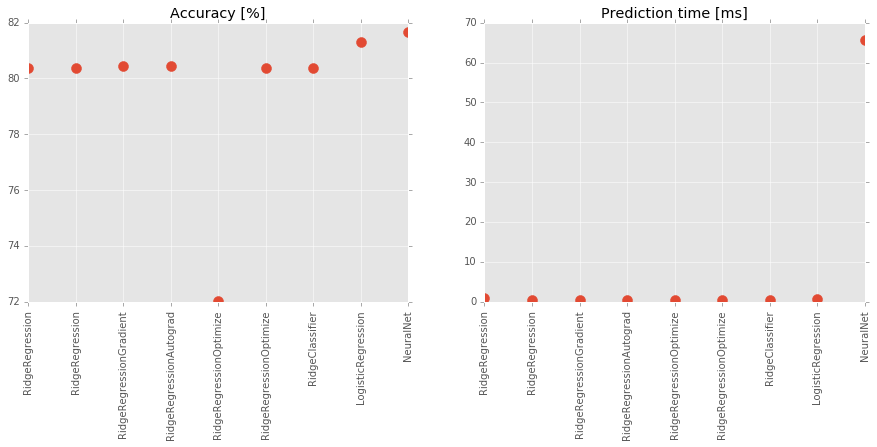

In [38]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
# Or notebook for interaction.

names, acc, times = [], [], []
for model in models:
    import time
    t = time.process_time()
    y_pred = model.predict(X_test)
    times.append((time.process_time()-t) * 1000)
    acc.append(accuracy(y_pred, y_test) * 100)
    names.append(type(model).__name__)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(acc, '.', markersize=20)
plt.title('Accuracy [%]')
plt.xticks(range(len(names)), names, rotation=90)

plt.subplot(122)
plt.plot(times, '.', markersize=20)
plt.title('Prediction time [ms]')
plt.xticks(range(len(names)), names, rotation=90)
plt.show()

##  12 Is Python slow ?

That is one of the most heard complain about Python. Because [CPython](https://en.wikipedia.org/wiki/CPython), the Python reference implementation, [interprets the language](https://en.wikipedia.org/wiki/Interpreted_language) (i.e. it compiles Python code to intermediate bytecode which is then interpreted by a virtual machine), it is inherentably slower than [compiled languages](https://en.wikipedia.org/wiki/Compiled_language), especially for computation heavy tasks such as number crunching.
There are three ways around it:
1. Use specialized libraries which provide efficient compiled implementations of the heavy computations. That is for example NumPy, which uses efficient BLAS and LAPACK implementations as a backend. SciPy and scikit-learn fall in the same category.
1. Compile Python to machine code. [Numba](http://numba.pydata.org) is a [just-in-time (JIT)](https://en.wikipedia.org/wiki/Just-in-time_compilation) compiler for Python, using the [LLVM](http://llvm.org) compiler infrastructure. [Cython](http://cython.org), which requires type information, [transpiles](https://en.wikipedia.org/wiki/Source-to-source_compiler) Python to C then compiles the generated C code. While these two approaches offer maximal compatibility with the CPython and NumPy ecosystems, another approach is to use another Python implementation such as [PyPy](http://pypy.org), which features a just-in-time compiler and supports multiple back-ends (C, CLI, JVM). Alternatives are [Jython](http://www.jython.org), which runs Python on the Java platform, and [IronPython](http://ironpython.net) / [PythonNet](http://pythonnet.github.io) for the .NET platform.
1. Call compiled code from Python.

Let's compare the execution time of the function which computes the accuracy of a classifier. We test seven implementations: a pure Python loop, the implementations provided by numpy and scikit-learn (first option above), compiled versions of Python by Numba and Cython (second option above), and compile C and Fortran (third option above).

In [39]:
def accuracy_numpy(y_pred, y_true):
    """Using NumPy, implemented in C."""
    return accuracy(y_pred, y_true)

def accuracy_sklearn(y_pred, y_true):
    return metrics.accuracy_score(y_pred, y_true)

def accuracy_python(y_pred, y_true):
    """Plain Python implementation."""
    num_total = 0
    num_correct = 0
    for y_pred_i, y_true_i in zip(y_pred, y_true):
        num_total += 1
        if y_pred_i == y_true_i:
            num_correct += 1
    return num_correct / num_total

### 12.1 Compiled Python

In [40]:
from numba import jit
# Decorator, same as accuracy_numba = jit(accuracy_python)

@jit
def accuracy_numba(y_pred, y_true):
    """Plain Python implementation, compiled by LLVM through Numba."""
    num_total = 0
    num_correct = 0
    for y_pred_i, y_true_i in zip(y_pred, y_true):
        num_total += 1
        if y_pred_i == y_true_i:
            num_correct += 1
    return num_correct / num_total

In [41]:
%load_ext Cython

In [42]:
%%cython
cimport numpy as np
cimport cython

@cython.boundscheck(False)  # Turn off bounds-checking for entire function.
@cython.wraparound(False)   # Turn off negative index wrapping for entire function.
def accuracy_cython(np.ndarray[long, ndim=1] y_pred, np.ndarray[long, ndim=1] y_true):
    cdef int num_total = 0
    cdef int num_correct = 0
    cdef int n = y_pred.size
    for i in range(n):
        num_total += 1
        if y_pred[i] == y_true[i]:
            num_correct += 1
    return num_correct / num_total

### 12.2 Using C from Python

In [43]:
%%file function.c

#include <stdio.h>

double accuracy(long* y_pred, long* y_true, int n) {
    int num_total = 0;
    int num_correct = 0;

    for(int i = 0; i < n; i++) {
        num_total++;
        if(y_pred[i] == y_true[i])
            num_correct++;
    }

    return (double) num_correct / num_total;
}

Writing function.c


In [44]:
%%script sh
FILE=function
gcc -c -O3 -Wall -std=c11 -pedantic -fPIC -o $FILE.o $FILE.c
gcc -o lib$FILE.so -shared $FILE.o
file lib$FILE.so

libfunction.so: ELF 64-bit LSB shared object, x86-64, version 1 (SYSV), dynamically linked, BuildID[sha1]=f024218956403196012ef5f01316520e64364c1b, not stripped


In [45]:
import ctypes

libfunction = np.ctypeslib.load_library('libfunction', './')
libfunction.accuracy.restype = ctypes.c_double
libfunction.accuracy.argtypes = [
    np.ctypeslib.ndpointer(dtype=np.int),
    np.ctypeslib.ndpointer(dtype=np.int),
    ctypes.c_int
]

def accuracy_c(y_pred, y_true):
    n = y_pred.size
    return libfunction.accuracy(y_pred, y_true, n)

### 12.3 Using Fortran from Python

In [46]:
%%file function.f

      SUBROUTINE DACCURACY(YPRED, YTRUE, ACC, N)

CF2PY INTENT(OUT) :: ACC
CF2PY INTENT(HIDE) :: N
      INTEGER*4 YPRED(N)
      INTEGER*4 YTRUE(N)
      DOUBLE PRECISION ACC
      INTEGER N, NTOTAL, NCORRECT

      NTOTAL = 0
      NCORRECT = 0

      DO 10 J = 1, N
         NTOTAL = NTOTAL + 1
         IF (YPRED(J) == YTRUE(J)) THEN
            NCORRECT = NCORRECT + 1
         END IF
 10   CONTINUE

      ACC = REAL(NCORRECT) / NTOTAL
      END

Writing function.f


In [47]:
!f2py -c -m function function.f >> /dev/null

In [48]:
import function
def accuracy_fortran(y_pred, y_true):
    return function.daccuracy(y_pred, y_true)

### 12.4 Measurements

It turns out the compiled versions by Numba and Cython are almost as fast as C ! Although much easier to write. In this case, they are even faster than Fortran, NumPy and scikit-learn. This gives us the best of both worlds ! An interpreted language for rapid development, which can then be compiled for efficient execution in production.

In [50]:
n = int(1e7)
y_pred = np.random.randint(2, size=n)
y_true = np.random.randint(2, size=n)

%timeit accuracy_python(y_pred, y_true)
%timeit accuracy_sklearn(y_pred, y_true)
%timeit accuracy_fortran(y_pred, y_true)
%timeit accuracy_numpy(y_pred, y_true)
%timeit accuracy_numba(y_pred, y_true)
%timeit accuracy_cython(y_pred, y_true)
%timeit accuracy_c(y_pred, y_true)

1 loop, best of 3: 2.38 s per loop
1 loop, best of 3: 434 ms per loop
10 loops, best of 3: 26.6 ms per loop
10 loops, best of 3: 21.8 ms per loop
100 loops, best of 3: 11.5 ms per loop
100 loops, best of 3: 10.6 ms per loop
100 loops, best of 3: 10.3 ms per loop


## Todo

* Introduce Data Science
* Show some SQL ORM
* High Performance Computing (HPC)
    * multiprocessing, IPython Parallel, MPI, OpenMP, OpenCL, CUDA
* Big Data
    * MapReduce, Cluster Computing (Hadoop, Spark)
* Graphs and Networks
    * Tools: networkx, graph-tool, gephi, graphviz, pygsp